In [1]:
import pandas as pd

train = pd.read_csv('titanic_data/train.csv')
test = pd.read_csv('titanic_data/test.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
import ydata_profiling
profile = train.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [16]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

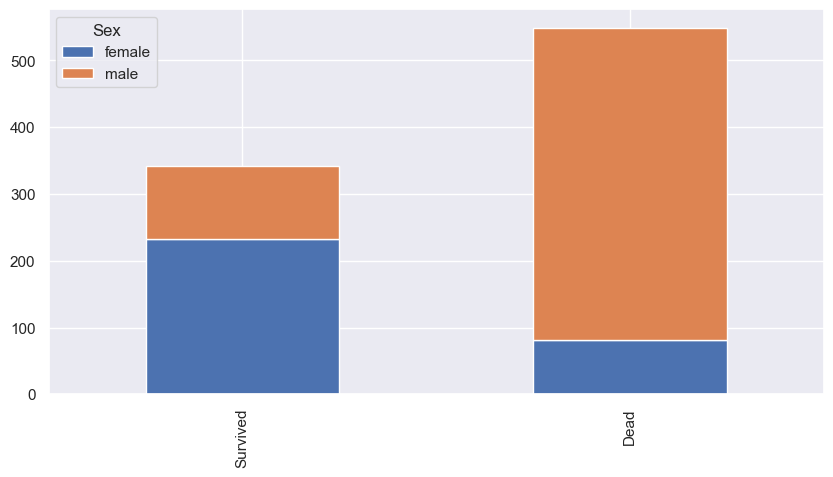

In [18]:
bar_chart('Sex')

#대체로 남성이 여성보다 사망 확률이 높음

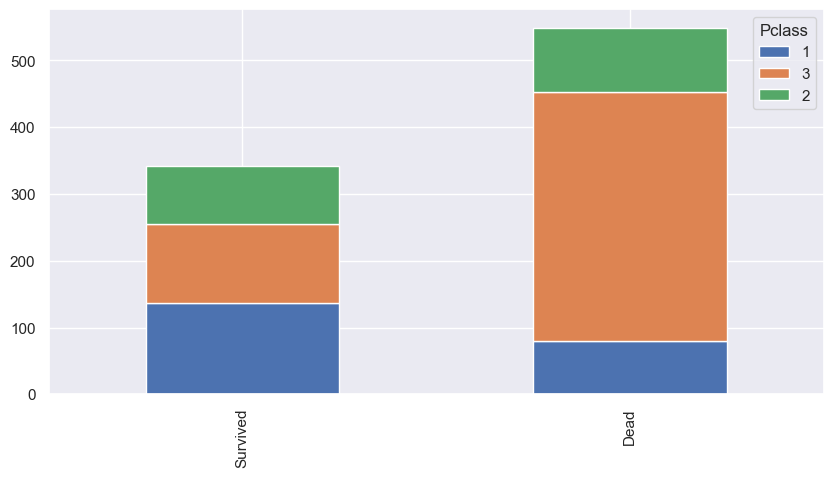

In [19]:
bar_chart('Pclass')

#1등석은 생존 확률이 높고, 3등석은 사망 확률이 높음

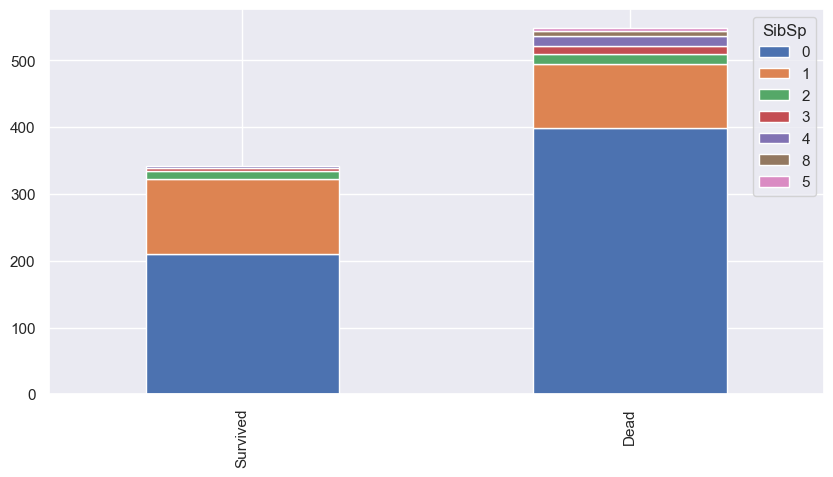

In [20]:
bar_chart('SibSp')

#혼자 탔을 경우 사망 확률이 높음

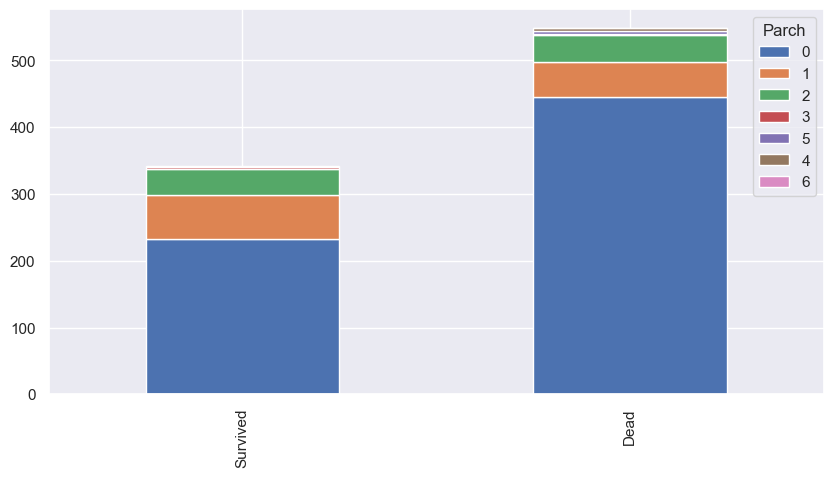

In [21]:
bar_chart('Parch')

#혼자 탔을 경우 사망 확률이 높음

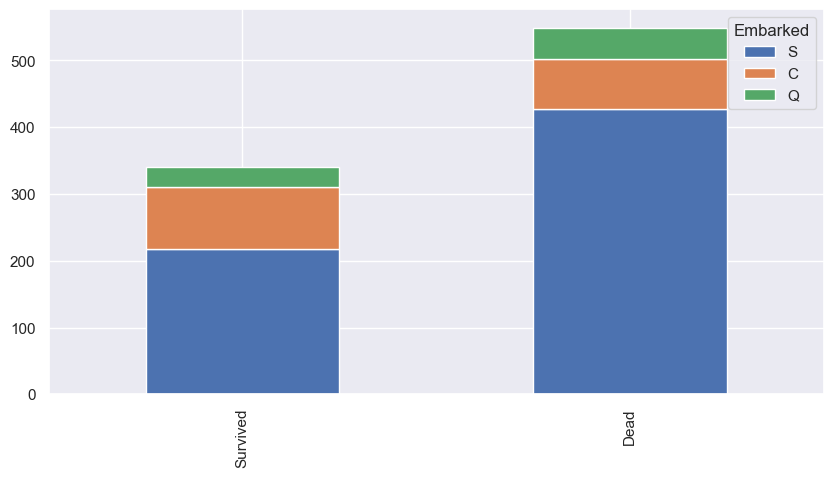

In [22]:
bar_chart('Embarked')

#S에서 탑승했을 시 사망 확률 높음

Feature Engineering

In [23]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [25]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [26]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

Mr : 0   
Miss : 1   
Mrs: 2   
Others: 3   

In [27]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [30]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      0  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      0

In [31]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  
0  34.5      0      0   330911   7.8292   NaN        Q      0  
1  47.0      1      0   363272   7.0000   NaN        S      2  
2  62.0      0      0   240276   9.6875   NaN        Q      0  
3  27.0      0      0   315154   8.6625   NaN        S      0  
4  22.0      1      1  3101298  12.2875   NaN        S      2

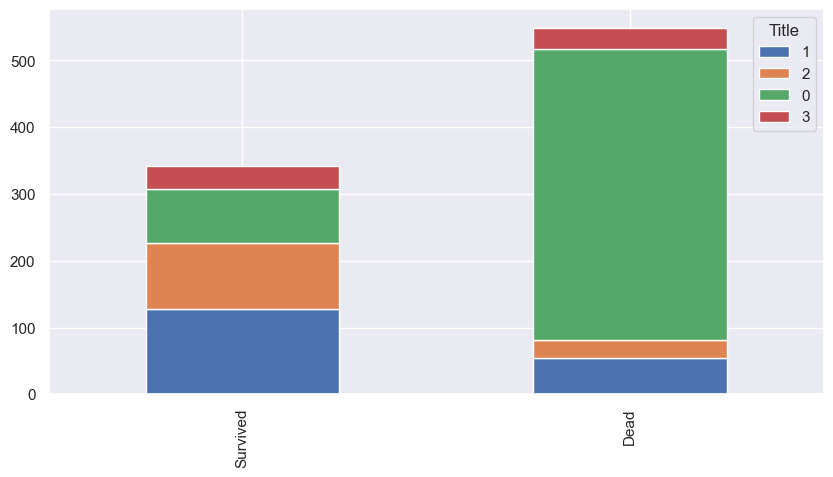

In [32]:
bar_chart('Title')

In [33]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [34]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

In [35]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title  
0        Q      0  
1        S      2  
2        Q      0  
3        S      0  
4        S      2

male: 0   
female: 1

In [36]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

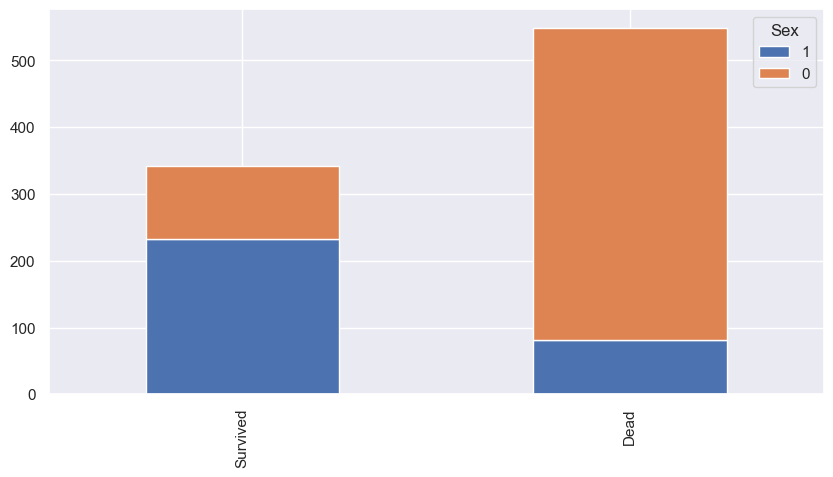

In [37]:
bar_chart('Sex')

Age 결측치를 title의 median으로 채워넣기

In [39]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

In [40]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

C:\Users\eundo\AppData\Local\Temp\ipykernel_34616\3218424126.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
C:\Users\eundo\AppData\Local\Temp\ipykernel_34616\3218424126.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [41]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

C:\Users\eundo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


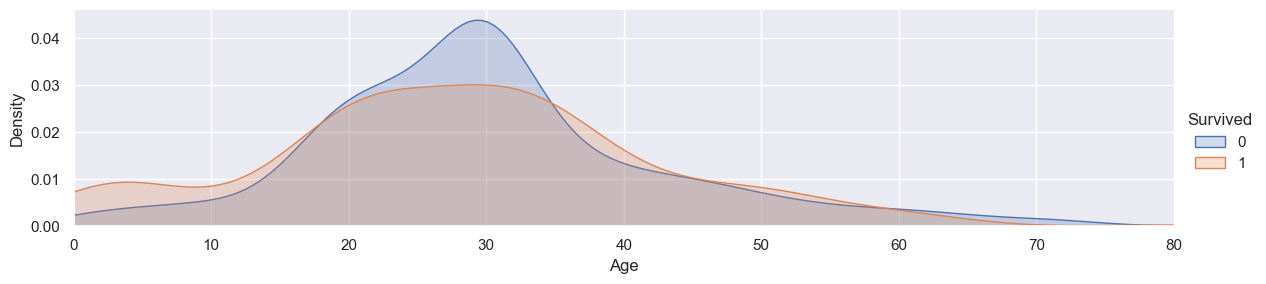

In [45]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.1+ KB


In [50]:
train[['Age']].describe()

Age
count  891.000000
mean    29.372806
std     13.227346
min      0.420000
25%     21.000000
50%     30.000000
75%     35.000000
max     80.000000

In [51]:
def binning_age(age):
    return (age // 5) * 5

In [52]:
train['Age_Binned'] = train['Age'].apply(binning_age)

In [55]:
train.head(30)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0             1         0       3    0  22.0      1      0         A/5 21171   
1             2         1       1    1  38.0      1      0          PC 17599   
2             3         1       3    1  26.0      0      0  STON/O2. 3101282   
3             4         1       1    1  35.0      1      0            113803   
4             5         0       3    0  35.0      0      0            373450   
5             6         0       3    0  30.0      0      0            330877   
6             7         0       1    0  54.0      0      0             17463   
7             8         0       3    0   2.0      3      1            349909   
8             9         1       3    1  27.0      0      2            347742   
9            10         1       2    1  14.0      1      0            237736   
10           11         1       3    1   4.0      1      1           PP 9549   
11           12         1       1    1  58.0      0      0            113783   
12           13         0       3    0  20.0      0      0         A/5. 2151   
13           14         0       3    0  39.0      1      5            347082   
14           15         0       3    1  14.0      0      0            350406   
15           16         1       2    1  55.0      0      0            248706   
16           17         0       3    0   2.0      4      1            382652   
17           18         1       2    0  30.0      0      0            244373   
18           19         0       3    1  31.0      1      0            345763   
19           20         1       3    1  35.0      0      0              2649   
20           21         0       2    0  35.0      0      0            239865   
21           22         1       2    0  34.0      0      0            248698   
22           23         1       3    1  15.0      0      0            330923   
23           24         1       1    0  28.0      0      0            113788   
24           25         0       3    1   8.0      3      1            349909   
25           26         1       3    1  38.0      1      5            347077   
26           27         0       3    0  30.0      0      0              2631   
27           28         0       1    0  19.0      3      2             19950   
28           29         1       3    1  21.0      0      0            330959   
29           30         0       3    0  30.0      0      0            349216   

        Fare        Cabin Embarked  Title  Age_Binned  
0     7.2500          NaN        S      0        20.0  
1    71.2833          C85        C      2        35.0  
2     7.9250          NaN        S      1        25.0  
3    53.1000         C123        S      2        35.0  
4     8.0500          NaN        S      0        35.0  
5     8.4583          NaN        Q      0        30.0  
6    51.8625          E46        S      0        50.0  
7    21.0750          NaN        S      3         0.0  
8    11.1333          NaN        S      2        25.0  
9    30.0708          NaN        C      2        10.0  
10   16.7000           G6        S      1         0.0  
11   26.5500         C103        S      1        55.0  
12    8.0500          NaN        S      0        20.0  
13   31.2750          NaN        S      0        35.0  
14    7.8542          NaN        S      1        10.0  
15   16.0000          NaN        S      2        55.0  
16   29.1250          NaN        Q      3         0.0  
17   13.0000          NaN        S      0        30.0  
18   18.0000          NaN        S      2        30.0  
19    7.2250          NaN        C      2        35.0  
20   26.0000          NaN        S      0        35.0  
21   13.0000          D56        S      0        30.0  
22    8.0292          NaN        Q      1        15.0  
23   35.5000           A6        S      0        25.0  
24   21.0750          NaN        S      1         5.0  
25   31.3875          NaN        S      2        35.0  
26    7.225

In [56]:
train['Age_Binned'].describe()

count    891.000000
mean      27.693603
std       13.453430
min        0.000000
25%       20.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age_Binned, dtype: float64

In [57]:
test['Age_Binned'] = test['Age'].apply(binning_age)

In [58]:
test['Age_Binned'].describe()

count    418.000000
mean      27.583732
std       13.086098
min        0.000000
25%       20.000000
50%       25.000000
75%       35.000000
max       75.000000
Name: Age_Binned, dtype: float64

In [78]:
# delete unnecessary feature from dataset
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)

embarked 결측치 채워넣기

<Axes: >

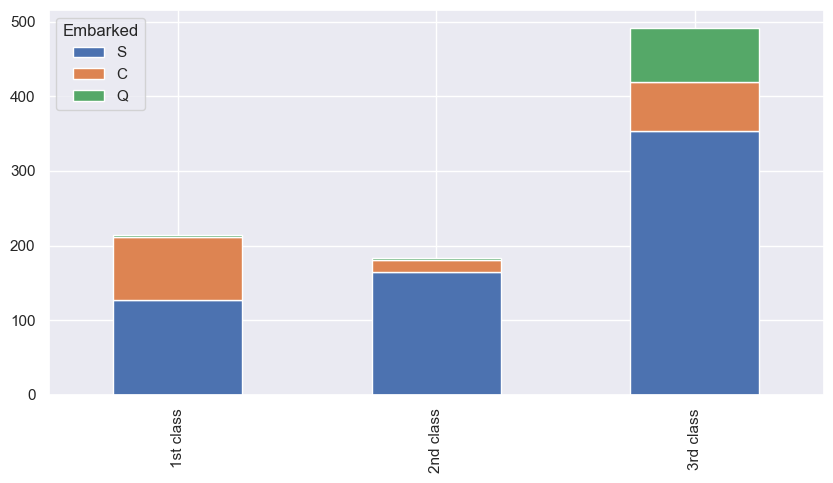

In [61]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

#결측치는 S로 replace

In [62]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [63]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin Embarked  Title  Age_Binned  
0   7.2500   NaN        S      0        20.0  
1  71.2833   C85        C      2        35.0  
2   7.9250   NaN        S      1        25.0  
3  53.1000  C123        S      2        35.0  
4   8.0500   NaN        S      0        35.0

In [64]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [65]:
# fill missing Fare with median fare for each Pclass

train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

C:\Users\eundo\AppData\Local\Temp\ipykernel_34616\2414407928.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\eundo\AppData\Local\Temp\ipykernel_34616\2414407928.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0             1         0       3    0  22.0      1      0         A/5 21171   
1             2         1       1    1  38.0      1      0          PC 17599   
2             3         1       3    1  26.0      0      0  STON/O2. 3101282   
3             4         1       1    1  35.0      1      0            113803   
4             5         0       3    0  35.0      0      0            373450   
5             6         0       3    0  30.0      0      0            330877   
6             7         0       1    0  54.0      0      0             17463   
7             8         0       3    0   2.0      3      1            349909   
8             9         1       3    1  27.0      0      2            347742   
9            10         1       2    1  14.0      1      0            237736   
10           11         1       3    1   4.0      1      1           PP 9549   
11           12         1       1    1  58.0      0      0            113783   
12           13         0       3    0  20.0      0      0         A/5. 2151   
13           14         0       3    0  39.0      1      5            347082   
14           15         0       3    1  14.0      0      0            350406   
15           16         1       2    1  55.0      0      0            248706   
16           17         0       3    0   2.0      4      1            382652   
17           18         1       2    0  30.0      0      0            244373   
18           19         0       3    1  31.0      1      0            345763   
19           20         1       3    1  35.0      0      0              2649   
20           21         0       2    0  35.0      0      0            239865   
21           22         1       2    0  34.0      0      0            248698   
22           23         1       3    1  15.0      0      0            330923   
23           24         1       1    0  28.0      0      0            113788   
24           25         0       3    1   8.0      3      1            349909   
25           26         1       3    1  38.0      1      5            347077   
26           27         0       3    0  30.0      0      0              2631   
27           28         0       1    0  19.0      3      2             19950   
28           29         1       3    1  21.0      0      0            330959   
29           30         0       3    0  30.0      0      0            349216   
30           31         0       1    0  40.0      0      0          PC 17601   
31           32         1       1    1  35.0      1      0          PC 17569   
32           33         1       3    1  21.0      0      0            335677   
33           34         0       2    0  66.0      0      0        C.A. 24579   
34           35         0       1    0  28.0      1      0          PC 17604   
35           36         0       1    0  42.0      1      0            113789   
36           37         1       3    0  30.0      0      0              2677   
37           38         0       3    0  21.0      0      0        A./5. 2152   
38           39         0       3    1  18.0      2      0            345764   
39           40         1       3    1  14.0      1      0              2651   
40           41         0       3    1  40.0      1      0              7546   
41           42         0       2    1  27.0      1      0             11668   
42           43         0       3    0  30.0      0      0            349253   
43           44         1       2    1   3.0      1      2     SC/Paris 2123   
44           45         1       3    1  19.0      0      0            330958   
45           46         0       3    0  30.0      0      0   S.C./A.4. 23567   
46           47         0       3    0  30.0      1      0            370371   
47           48         1       3    1  21.0      0      0             14311   
48           49         0       3    0  30.0      2      0              2662   
49  

C:\Users\eundo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\eundo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\eundo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


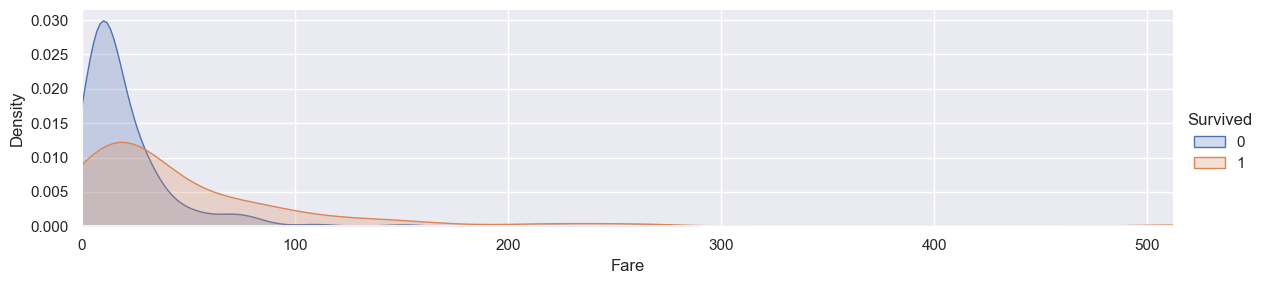

In [66]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

In [68]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [70]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

   Fare Cabin  Embarked  Title  Age_Binned  
0   0.0   NaN         0      0        20.0  
1   2.0   C85         1      2        35.0  
2   0.0   NaN         0      1        25.0  
3   2.0  C123         0      2        35.0  
4   0.0   NaN         0      0        35.0

In [71]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [72]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

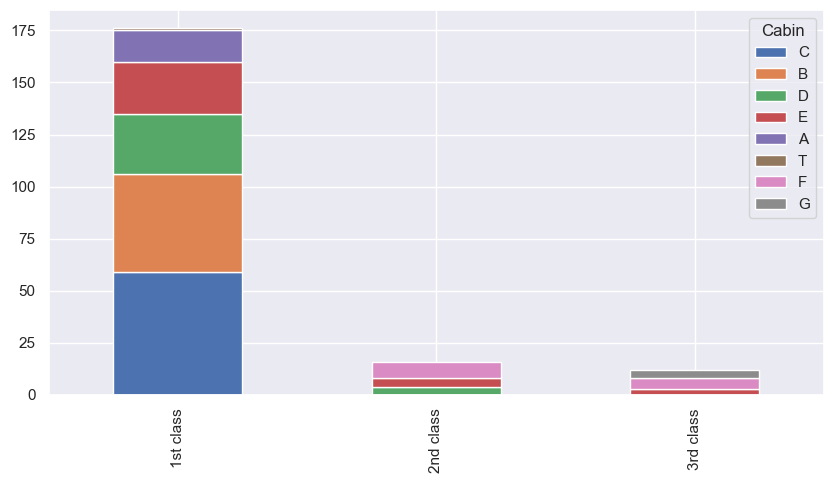

In [73]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [74]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [75]:
# fill missing Fare with median fare for each Pclass

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

C:\Users\eundo\AppData\Local\Temp\ipykernel_34616\2413379557.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
C:\Users\eundo\AppData\Local\Temp\ipykernel_34616\2413379557.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [79]:
train.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch            Ticket  Fare  \
0            1         0       3    0      1      0         A/5 21171   0.0   
1            2         1       1    1      1      0          PC 17599   2.0   
2            3         1       3    1      0      0  STON/O2. 3101282   0.0   
3            4         1       1    1      1      0            113803   2.0   
4            5         0       3    0      0      0            373450   0.0   

   Cabin  Embarked  Title  Age_Binned  
0    2.0         0      0        20.0  
1    0.8         1      2        35.0  
2    2.0         0      1        25.0  
3    0.8         0      2        35.0  
4    2.0         0      0        35.0

In [80]:
test.head()

PassengerId  Pclass  Sex  SibSp  Parch   Ticket  Fare  Cabin  Embarked  \
0          892       3    0      0      0   330911   0.0    2.0         2   
1          893       3    1      1      0   363272   0.0    2.0         0   
2          894       2    0      0      0   240276   0.0    2.0         2   
3          895       3    0      0      0   315154   0.0    2.0         0   
4          896       3    1      1      1  3101298   0.0    2.0         0   

   Title  Age_Binned  
0      0        30.0  
1      2        45.0  
2      0        60.0  
3      0        25.0  
4      2        20.0

In [81]:
features_drop = ['Ticket']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [84]:
train.head()

Survived  Pclass  Sex  SibSp  Parch  Fare  Cabin  Embarked  Title  \
0         0       3    0      1      0   0.0    2.0         0      0   
1         1       1    1      1      0   2.0    0.8         1      2   
2         1       3    1      0      0   0.0    2.0         0      1   
3         1       1    1      1      0   2.0    0.8         0      2   
4         0       3    0      0      0   0.0    2.0         0      0   

   Age_Binned  
0        20.0  
1        35.0  
2        25.0  
3        35.0  
4        35.0

In [85]:
test.head()

PassengerId  Pclass  Sex  SibSp  Parch  Fare  Cabin  Embarked  Title  \
0          892       3    0      0      0   0.0    2.0         2      0   
1          893       3    1      1      0   0.0    2.0         0      2   
2          894       2    0      0      0   0.0    2.0         2      0   
3          895       3    0      0      0   0.0    2.0         0      0   
4          896       3    1      1      1   0.0    2.0         0      2   

   Age_Binned  
0        30.0  
1        45.0  
2        60.0  
3        25.0  
4        20.0

In [86]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [87]:
train_data.head(10)

Pclass  Sex  SibSp  Parch  Fare  Cabin  Embarked  Title  Age_Binned
0       3    0      1      0   0.0    2.0         0      0        20.0
1       1    1      1      0   2.0    0.8         1      2        35.0
2       3    1      0      0   0.0    2.0         0      1        25.0
3       1    1      1      0   2.0    0.8         0      2        35.0
4       3    0      0      0   0.0    2.0         0      0        35.0
5       3    0      0      0   0.0    2.0         2      0        30.0
6       1    0      0      0   2.0    1.6         0      0        50.0
7       3    0      3      1   1.0    2.0         0      3         0.0
8       3    1      0      2   0.0    2.0         0      2        25.0
9       2    1      1      0   2.0    1.8         1      2        10.0

# Modeling

In [88]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   Title       891 non-null    int64  
 9   Age_Binned  891 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 69.7 KB


## Cross Validation (K-fold)

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### kNN

In [120]:
clf = KNeighborsClassifier(n_neighbors = 9)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.79775281 0.78651685 0.74157303 0.82022472 0.83146067
 0.80898876 0.78651685 0.78651685 0.82022472]


In [121]:
# kNN Score
round(np.mean(score)*100, 2)

79.35

### Decision Tree

In [122]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.80898876 0.71910112 0.7752809  0.80898876 0.82022472
 0.83146067 0.78651685 0.74157303 0.7752809 ]


In [123]:
# decision tree Score
round(np.mean(score)*100, 2)

78.45

### Ramdom Forest

In [144]:
clf = RandomForestClassifier(n_estimators=20)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.84269663 0.80898876 0.80898876 0.88764045 0.78651685
 0.79775281 0.80898876 0.75280899 0.86516854]


In [145]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.6

### Naive Bayes

In [146]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.71910112 0.75280899 0.74157303 0.70786517 0.80898876
 0.76404494 0.78651685 0.82022472 0.83146067]


In [147]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.66

### SVM

In [148]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.72222222 0.82022472 0.76404494 0.68539326 0.78651685 0.80898876
 0.75280899 0.76404494 0.68539326 0.73033708]


In [149]:
round(np.mean(score)*100,2)

75.2

# Test

In [150]:
clf = RandomForestClassifier(n_estimators=20)

clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [151]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [154]:
submission = pd.read_csv('submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0